Preparing the Dataset

In [107]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
df = pd.read_csv(url)
print(df.head())

   engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                  170            3.0       159.0     3413.433759   
1                  130            5.0        97.0     3149.664934   
2                  170            NaN        78.0     3079.038997   
3                  220            4.0         NaN     2542.392402   
4                  210            1.0       140.0     3460.870990   

   acceleration  model_year  origin fuel_type         drivetrain  num_doors  \
0          17.7        2003  Europe  Gasoline    All-wheel drive        0.0   
1          17.8        2007     USA  Gasoline  Front-wheel drive        0.0   
2          15.1        2018  Europe  Gasoline  Front-wheel drive        0.0   
3          20.2        2009     USA    Diesel    All-wheel drive        2.0   
4          14.4        2009  Europe  Gasoline    All-wheel drive        2.0   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3         

In [33]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [108]:
df_new = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df_new.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [35]:
df_new.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

Exploratory Data Analysis

In [36]:
for col in df_new.columns:
    print(col, df_new[col].unique()[:5], df_new[col].nunique(),"\n")

engine_displacement [170 130 220 210 190] 36 

horsepower [159.  97.  78.  nan 140.] 192 

vehicle_weight [3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999] 9704 

model_year [2003 2007 2018 2009 2008] 24 

fuel_efficiency_mpg [13.23172891 13.68821744 14.246341   16.9127356  12.48836912] 9704 



Look at the fuel_efficiency_mpg variable. Does it have a long tail?

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

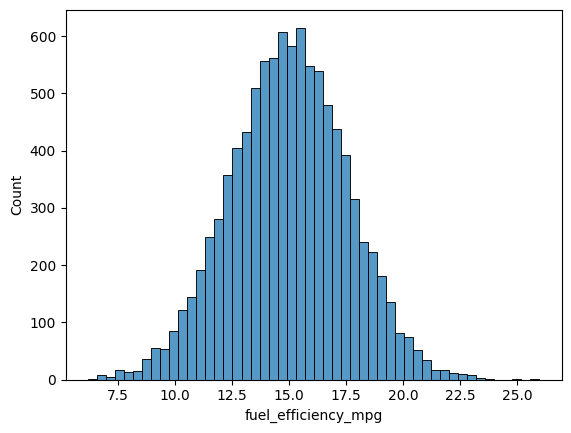

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Histogram Plot
sns.histplot(df_new.fuel_efficiency_mpg, bins=50)

There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [38]:
df_new.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

What's the median (50% percentile) for variable 'horsepower'?

49
99
149
199

In [39]:
df_new['horsepower'].mean()

np.float64(149.65729212983547)

In [40]:
df_new['horsepower'].median()

np.float64(149.0)

Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [41]:
#Train - 60%, Val - 20%, Test - 20%
n = len(df)
n_val= int(len(df) * 0.2)
n_test= int(len(df) * 0.2)
n_train = n - n_val - n_test

In [42]:
n, n_train + n_val + n_test

(9704, 9704)

In [43]:
n_train, n_val, n_test

(5824, 1940, 1940)

In [44]:
idx = np.arange(n)
np.random.seed(42) # for reproducibility
np.random.shuffle(idx)

In [45]:
df_train = df_new.iloc[idx[:n_train]]
df_val = df_new.iloc[idx[n_train:n_train + n_val]]
df_test = df_new.iloc[idx[n_train + n_val:]]

In [46]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [47]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [48]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)   
df_test = df_test.reset_index(drop=True)

In [49]:
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

In [50]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']  
del df_test['fuel_efficiency_mpg']

In [51]:
len(y_train), len(y_val), len(y_test)

(5824, 1940, 1940)

Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0
With mean
Both are equally good

Filling Missing values with 0

In [58]:
df_zero_train = df_train.copy()
df_zero_val = df_val.copy() 
df_zero_test = df_test.copy()

df_zero_train['horsepower'] = df_zero_train['horsepower'].fillna(0).values

df_zero_train.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [63]:
X_zero_train = np.array(df_zero_train)
X_zero_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [81]:
X_zero_val = np.array(df_zero_val)
X_zero_val

array([[ 180.        ,  112.        , 2772.13441008, 2020.        ],
       [ 260.        ,  138.        , 3014.06152983, 2022.        ],
       [ 140.        ,  181.        , 3652.18615117, 2016.        ],
       ...,
       [ 230.        ,  202.        , 3303.00068812, 2008.        ],
       [ 220.        ,  169.        , 3293.42025107, 2008.        ],
       [ 200.        ,  117.        , 2692.7812918 , 2004.        ]],
      shape=(1940, 4))

In [82]:
X_zero_test = np.array(df_zero_test)
X_zero_test

array([[ 140.        ,  148.        , 2704.82600507, 2017.        ],
       [ 210.        ,  136.        , 3001.22749027, 2004.        ],
       [ 210.        ,  152.        , 3747.467392  , 2021.        ],
       ...,
       [ 290.        ,  187.        , 2440.50803916, 2019.        ],
       [ 260.        ,  129.        , 1865.40447951, 2019.        ],
       [ 270.        ,  147.        , 2611.9394998 , 2017.        ]],
      shape=(1940, 4))

In [68]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    W_full = XTX_inv.dot(X.T).dot(y)
    return W_full[0], W_full[1:]  # return bias and weights

In [69]:
w0_zero, w_zero = train_linear_regression(X_zero_train, y_train)
w0_zero, w_zero

(np.float64(28.827365474598718),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992869e-04]))

In [71]:
y_zero_pred = w0_zero + X_zero_train.dot(w_zero)
y_zero_pred

array([17.33526223, 16.29296317, 17.69885099, ..., 17.54541307,
       18.78287539, 17.86564842], shape=(5824,))

<Axes: ylabel='Count'>

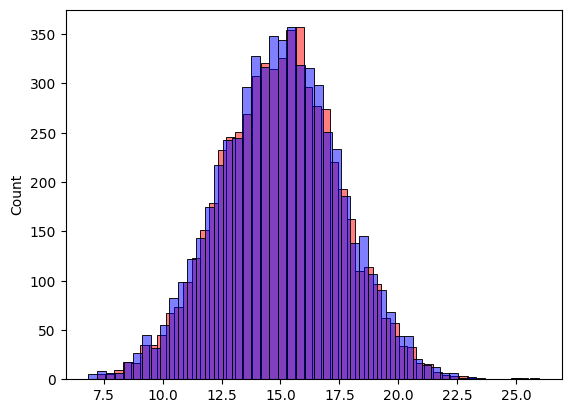

In [72]:
sns.histplot(y_zero_pred, bins=50, alpha = 0.5, color='red')
sns.histplot(y_train, bins=50, alpha = 0.5, color='blue')

In [75]:
def rmse(y, y_pred): 
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [76]:
rmse(y_train, y_zero_pred)

np.float64(0.5202614265099076)

In [79]:
rmse(y_train, y_zero_pred).round(2)

np.float64(0.52)

Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If multiple options give the same best RMSE, select the smallest r.

Options:

0
0.01
1
10
100

In [84]:
def train_linear_regression_reg(X, y, r= 0.001):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + np.eye(XTX.shape[0]) * r  # Add small value to diagonal elements
    
    XTX_inv = np.linalg.inv(XTX)
    W_full = XTX_inv.dot(X.T).dot(y)
    return W_full[0], W_full[1:]  # return bias and weights

In [88]:
df_zero_val['horsepower'] = df_zero_val['horsepower'].fillna(0).values
X_zero_val = np.array(df_zero_val)

In [89]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_zero_train, y_train, r=r)

    X_val = X_zero_val
    y_pred = w0 + X_val.dot(w)
    rmse(y_val, y_pred)
    print(r, rmse(y_val, y_pred))

0 0.5173782638841185
0.01 0.5171115525775559
0.1 0.5187525130701629
1 0.5222348802092528
5 0.5228916092823455
10 0.5229812979636569
100 0.5230636233819926


Filling Missing values with Mean

In [65]:
df_mean_train = df_train.copy()
df_mean_val = df_val.copy() 
df_mean_test = df_test.copy()

df_mean_train['horsepower'] = df_mean_train['horsepower'].fillna(df_mean_train['horsepower'].mean()).values

df_mean_train.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [66]:
X_mean_train = np.array(df_mean_train)
X_mean_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [70]:
w0_mean, w_mean = train_linear_regression(X_mean_train, y_train)
w0_mean, w_mean

(np.float64(28.92525995211667),
 array([ 0.00012093,  0.01030308, -0.00501009, -0.00023463]))

In [73]:
y_mean_pred = w0_mean + X_mean_train.dot(w_mean)
y_mean_pred

array([17.25910991, 16.19011261, 17.6924588 , ..., 17.51666431,
       18.77812427, 17.84593445], shape=(5824,))

<Axes: ylabel='Count'>

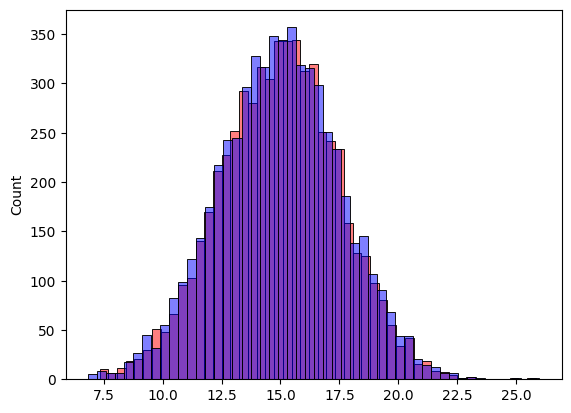

In [74]:
sns.histplot(y_mean_pred, bins=50, alpha = 0.5, color='red')
sns.histplot(y_train, bins=50, alpha = 0.5, color='blue')

In [77]:
rmse(y_train, y_mean_pred)

np.float64(0.46244121379599645)

In [78]:
rmse(y_train, y_mean_pred).round(2)

np.float64(0.46)

Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

0.001
0.006
0.060
0.600

In [101]:
n = len(df_new)
val_rmse_list = []

for s in range(10):
    np.random.seed(s)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    #Train - 60%, Val - 20%, Test - 20%
    n_val= int(n * 0.2)
    n_test= int(n * 0.2)
    n_train = n - n_val - n_test
    
    df_train = df_new.iloc[idx[:n_train]].copy()
    df_val = df_new.iloc[idx[n_train:n_train+n_val]].copy()
    df_test = df_new.iloc[idx[n_train+n_val:]].copy()
    
    # Fill missing values with 0
    df_train['horsepower'] = df_train['horsepower'].fillna(0).values
    X_train = np.array(df_train)
    y_train = df_train['fuel_efficiency_mpg'].to_numpy()

    df_val['horsepower'] = df_val['horsepower'].fillna(0).values
    X_val = np.array(df_val)
    y_val = df_val['fuel_efficiency_mpg'].to_numpy()
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']  
    del df_test['fuel_efficiency_mpg']
    
    # Train model
    w0, w = train_linear_regression(X_train, y_train)
    
    # Predict and evaluate
    y_pred = w0 + X_val.dot(w)
    val_rmse_list.append(rmse(y_val, y_pred))

# Compute standard deviation
std_rmse = np.std(val_rmse_list)
print(val_rmse_list)
print("Standard Deviation of RMSEs:" , std_rmse)
print(round(std_rmse, 3))

[np.float64(3.517048602366516e-10), np.float64(6.178462871908001e-12), np.float64(2.977778355704152e-11), np.float64(1.5467886504523304e-10), np.float64(2.3950181613139845e-11), np.float64(2.5030829552547143e-11), np.float64(1.965322973907655e-10), np.float64(3.2587118256100925e-11), np.float64(3.0912251824310454e-10), np.float64(8.57526784552864e-11)]
Standard Deviation of RMSEs: 1.2026837538289179e-10
0.0


Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:

0.15
0.515
5.15
51.5

In [102]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

In [103]:
#Train - 60%, Val - 20%, Test - 20%
n_val= int(n * 0.2)
n_test= int(n * 0.2)
n_train = n - n_val - n_test

In [109]:
df_train = df_new.iloc[idx[:n_train]].copy()
df_val = df_new.iloc[idx[n_train:n_train+n_val]].copy()
df_test = df_new.iloc[idx[n_train+n_val:]].copy()

In [111]:
# Fill missing values with 0
df_train['horsepower'] = df_train['horsepower'].fillna(0).values
y_train = df_train['fuel_efficiency_mpg'].to_numpy()

df_val['horsepower'] = df_val['horsepower'].fillna(0).values
y_val = df_val['fuel_efficiency_mpg'].to_numpy()


In [112]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']  
del df_test['fuel_efficiency_mpg']

In [113]:
X_train = np.array(df_train)
X_val = np.array(df_val)

In [116]:
# Train model
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
w0, w

(np.float64(27.086439654118813),
 array([-7.49586511e-05,  3.51346639e-03, -5.02046531e-03,  1.24171106e-03]))

In [119]:
# Predict and evaluate
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5131790626923073)